# PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões (2024)

Autores: Lucas Carvalho, Lucas Loli, Victor Caballero

## Ambiente

As principais bibliotecas que serão utilizadas para analisar a base

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

## Dados

Os dados que serão analisados

In [21]:
trainData = pd.read_csv(
    "./adult/train_data.csv",
    na_values= '?',
    index_col= ['Id'],
    header= 0,
    names= [
        "Id",
        "Age",
        "Workclass",
        "Fnlwgt",
        "Education",
        "Education-num",
        "Marital-status",
        "Occupation",
        "Relationship",
        "Race",
        "Sex",
        "Capital-gain",
        "Capital-loss",
        "Hours-per-week",
        "Native-country",
        "Target"
    ]
)

testData = pd.read_csv(
    "./adult/test_data.csv",
    na_values= '?',
    index_col= ['Id'],
    header= 0,
    names= [
        "Id",
        "Age",
        "Workclass",
        "Fnlwgt",
        "Education",
        "Education-num",
        "Marital-status",
        "Occupation",
        "Relationship",
        "Race",
        "Sex",
        "Capital-gain",
        "Capital-loss",
        "Hours-per-week",
        "Native-country"
    ]
)

## Análise de Dados

As principais análises de dados

In [22]:
trainData.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [23]:
trainData.describe(include= ['O'])

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country,Target
count,30724,32560,32560,30717,32560,32560,32560,31977,32560
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


Analogamente, para os dados de validação

In [24]:
testData.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
Id,,,,,,,,,,,,,,
0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [25]:
testData.describe(include= ['O'])

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country
count,15317,16280,16280,15314,16280,16280,16280,16006
unique,8,16,7,14,6,5,2,40
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,11209,5283,7403,2032,6523,13946,10859,14661


O próximo passo é conseguir tratar adequadamente os dados, e então implementar o KNN.

Contudo, nota-se que a Feature Education pode ser, primeiramente, omitida, dado que há uma correspondência numérica definida

In [26]:
trainData.drop("Education", axis= 1, inplace= True)

### Feature - Workclass

Faltam 1836 dados na coluna Workclass


<Axes: xlabel='Workclass'>

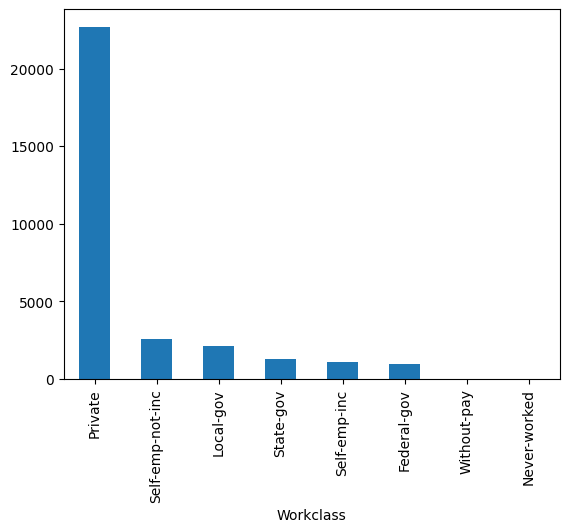

In [27]:
print("Faltam " + str(trainData["Workclass"].isnull().sum()) + " dados na coluna Workclass")
trainData["Workclass"].value_counts().plot(kind= "bar")

Vamos realizar um oversampling - como o mais comum é Private, com uma boa discrepância, será escolhido esse valor para substituir a Feature

In [28]:
trainData["Workclass"] = trainData["Workclass"].fillna("Private")

In [29]:
# Create a boolean mask and assign values directly
trainData["isPrivate"] = trainData["Workclass"].apply(lambda x: 1 if x == "Private" else 0)

# Convert the new 'isPrivate' column to float
trainData["isPrivate"] = trainData["isPrivate"].astype(float)

trainData.drop("Workclass", axis= 1, inplace= True)

### Feature - Occupation

Faltam 1843 dados na coluna Occupation


<Axes: xlabel='Occupation'>

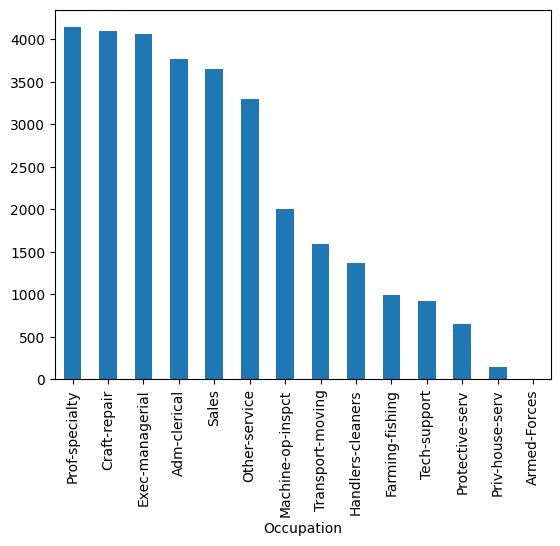

In [30]:
print("Faltam " + str(trainData["Occupation"].isnull().sum()) + " dados na coluna Occupation")
trainData["Occupation"].value_counts().plot(kind= "bar")

Não há um padrão bem visto. Será feito undersampling nos dados faltantes apenas

In [31]:
trainData["Occupation"].dropna(inplace= True)

Em seguida, one-hot-encoding

In [32]:
trainData = pd.concat([trainData, pd.get_dummies(trainData["Occupation"], prefix= "Occ")], axis= 1)
trainData.drop("Occupation", axis= 1, inplace= True)

### Feature - Native-Country

Faltam 583 dados na coluna Native-country


<Axes: xlabel='Native-country'>

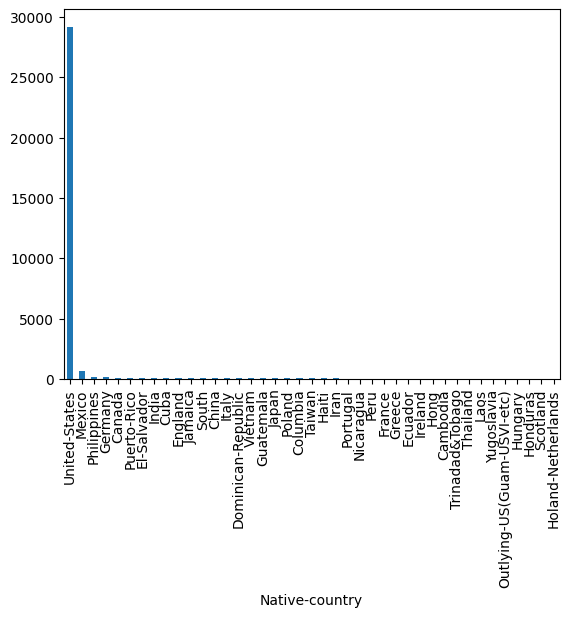

In [33]:
print("Faltam " + str(trainData["Native-country"].isnull().sum()) + " dados na coluna Native-country")
trainData["Native-country"].value_counts().plot(kind= "bar")

In [34]:
# Create a boolean mask and assign values directly
trainData["isFromUS"] = trainData["Native-country"].apply(lambda x: 1 if x == "United-States" else 0)

# Convert the new 'isPrivate' column to float
trainData["isFromUS"] = trainData["isFromUS"].astype(int)

trainData.drop("Native-country", axis= 1, inplace= True)

### Demais Features (possivelmente, de mesmo impacto)

<Axes: title={'center': 'Race'}, xlabel='Race'>

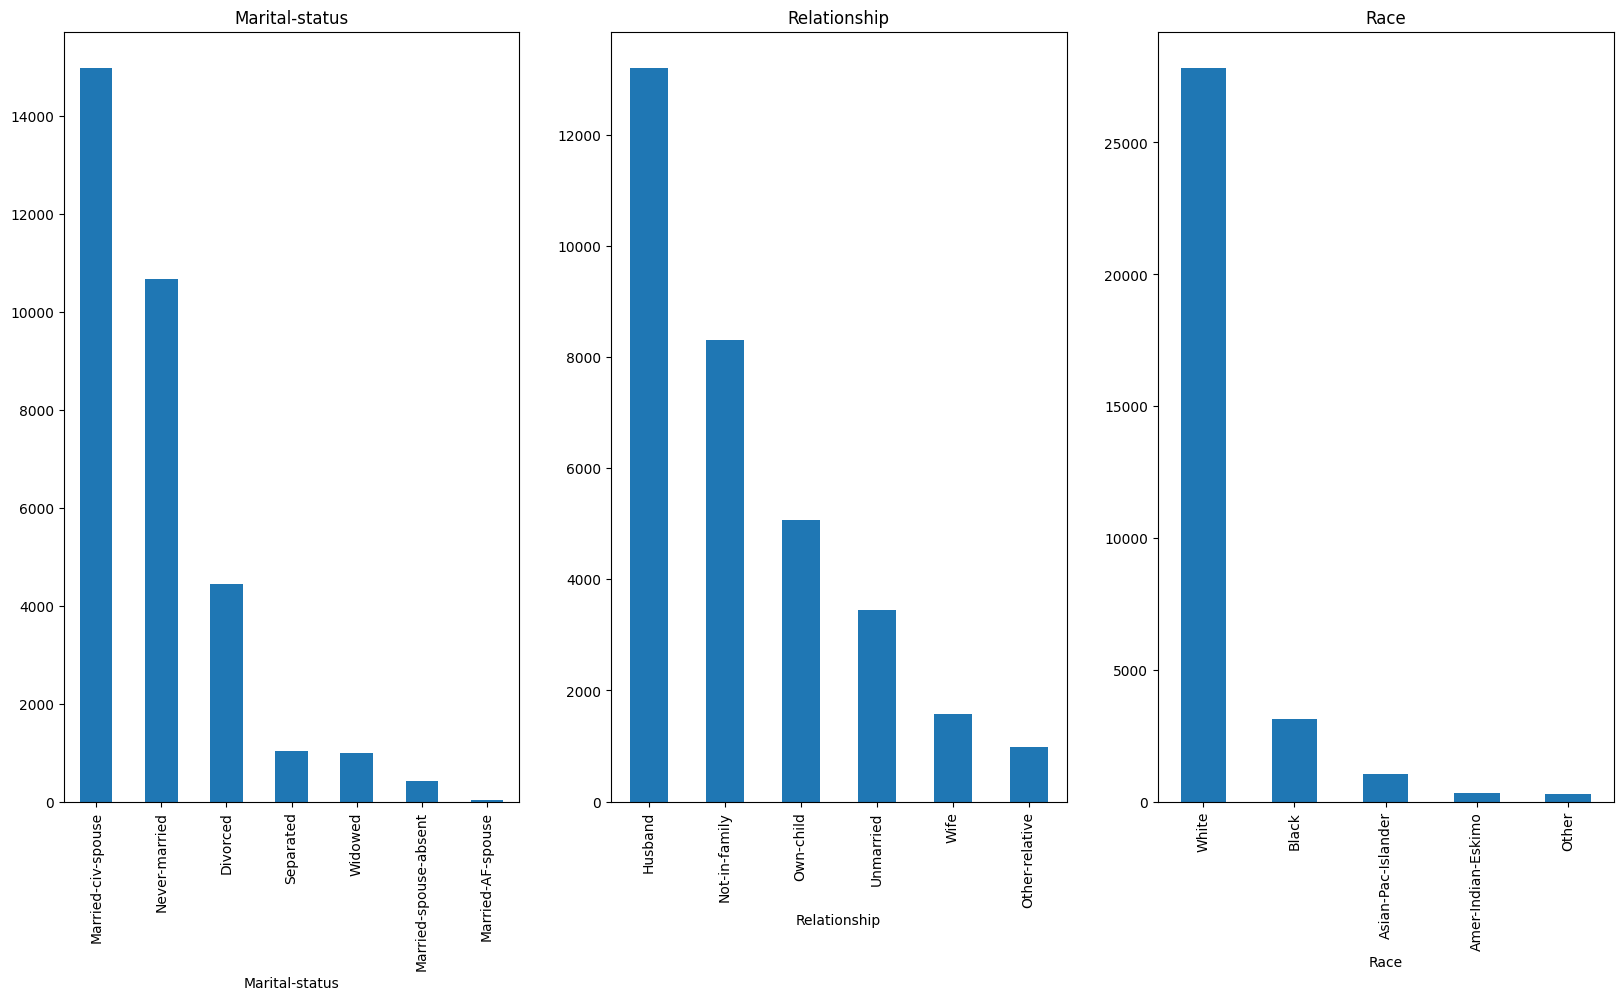

In [35]:
fig, axis = plt.subplots(nrows= 1, ncols= 3)
trainData["Marital-status"].value_counts().plot(kind= "bar", ax= axis[0], title= "Marital-status", figsize=(20,10))
trainData["Relationship"].value_counts().plot(kind= "bar", ax= axis[1], title= "Relationship")
trainData["Race"].value_counts().plot(kind= "bar", ax= axis[2], title= "Race")

Apenas one-hot-encoding em todos os dados, sem grandes problemas

In [36]:
trainData = pd.concat([trainData, pd.get_dummies(trainData["Marital-status"], prefix= "Mar")], axis= 1)
trainData = pd.concat([trainData, pd.get_dummies(trainData["Relationship"], prefix= "Rel")], axis= 1)
trainData = pd.concat([trainData, pd.get_dummies(trainData["Race"], prefix= "Race")], axis= 1)
trainData.drop("Marital-status", axis= 1, inplace= True)
trainData.drop("Relationship", axis= 1, inplace= True)
trainData.drop("Race", axis= 1, inplace= True)

trainData.loc[trainData["Sex"] != "Male", "Sex"] = 0.0
trainData.loc[trainData["Sex"] == "Male", "Sex"] = 1.0
trainData["Sex"] = trainData["Sex"].astype(float)
trainData.rename(columns={"Sex": "isMale"}, inplace= True)
trainData.loc[trainData["Target"] != ">50K", "Target"] = 0
trainData.loc[trainData["Target"] == ">50K", "Target"] = 1
trainData["Target"] = trainData["Target"].astype(float)

In [37]:
trainData.head()

,Age,Fnlwgt,Education-num,isMale,Capital-gain,Capital-loss,Hours-per-week,Target,isPrivate,Occ_Adm-clerical,...,Rel_Not-in-family,Rel_Other-relative,Rel_Own-child,Rel_Unmarried,Rel_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
Id,,,,,,,,,,,,,,,,,,,,,
16280,34,204991,10,1.0,0,0,44,0.0,1.0,False,...,False,False,True,False,False,False,False,False,False,True
16281,58,310085,6,1.0,0,0,40,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,True
16282,25,146117,10,1.0,0,0,42,0.0,1.0,False,...,True,False,False,False,False,False,False,False,False,True
16283,24,138938,10,0.0,0,0,40,0.0,1.0,True,...,True,False,False,False,False,False,False,False,False,True
16284,57,258883,9,1.0,5178,0,60,1.0,0.0,False,...,False,False,False,False,False,False,False,False,False,True


### Análise de Correlação

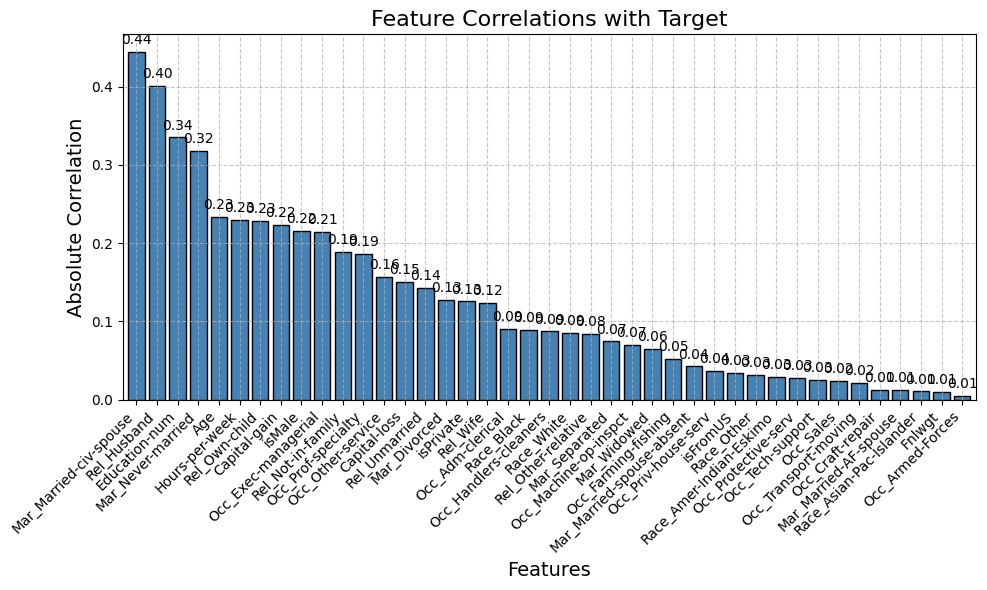

In [38]:
# Calculate correlation and prepare data
correlation = trainData.corr()
correlation.drop("Target", axis=0, inplace=True)
sorted_correlation = correlation["Target"].abs().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sorted_correlation.plot(kind="bar", color="steelblue", edgecolor="black", width=0.8)

# Customizations
plt.title("Feature Correlations with Target", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Absolute Correlation", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for index, value in enumerate(sorted_correlation):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()